# Hello and welcome to this portfolio project in line with Codecademy's career path Data Science: Machine Learning Specialist.

## Aiming to explore, understand and overview data relating to the diverse animals in National parks and hopefully analyzing their conservation status and perhaps notice trends and insight.

## Two datasets will be explored:

    Species_info: Contains category (species), scientific_name, common_names and 
    conservation_status (fictional data)
    
    Observations: Contains Scientific_name, Park, Observations (fictional data)
    
    
    Note: The observations were recorded by each park in the span of 7 days (fictional data)

## The project aims to explore:
    
    What are the species in check?
    
    What is the overall state of conservation?
    
    How are observations divided across each park?
    
    What is the actual distribution of observations?
    
    What are the protected and unportected animal counts for each park?
    
    What is the most prevalent species that was observed?
    
-----------------------
-----------------------

## In addition, making infrences on the following questions:

    Is there an association between a type of species and their of conservation status? (Suggested by Codecademy)
    
    Is there an association between a type of species and their chance of being observed?

In [102]:
# Importing the relevant libraries and aliasing them

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [103]:
# Loading data

Species = pd.read_csv("species_info.csv")
Observations = pd.read_csv("observations.csv")

In [104]:
# Checking the first 5 rows of the Species dataframe

Species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [105]:
# Basic data exploration on the Species dataframe

print(f"Total animals : {len(Species)}")

Total animals : 5824


In [106]:
# Basic info on Species dataframe
Species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [107]:
# Describe the summary statics of variables

Species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Castor canadensis,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [108]:
# Checking for missing data

Species.isna().any()

category               False
scientific_name        False
common_names           False
conservation_status     True
dtype: bool

In [109]:
# Checking duplicates

# To address the species in check:


In [110]:
Species.category.unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

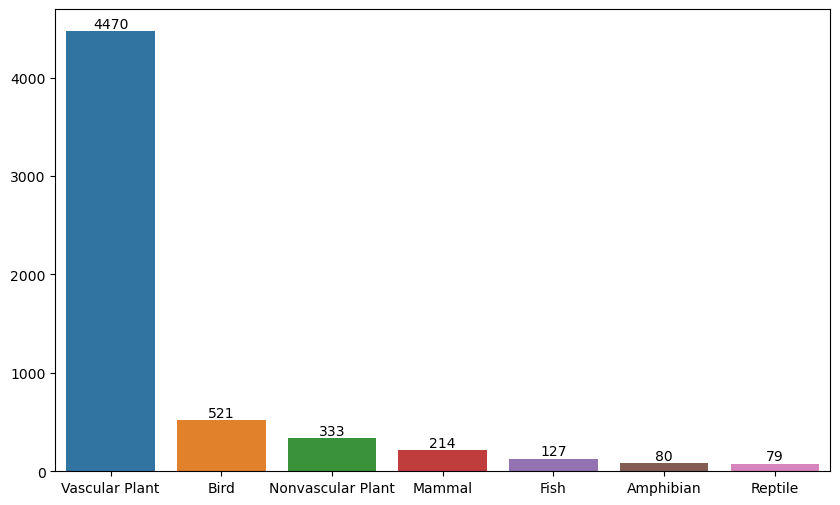

<Figure size 640x480 with 0 Axes>

In [111]:
# To plot the counts of each species
species = list(Species.category.value_counts().index) 
counts = list(Species.category.value_counts())
plt.figure(figsize=(10,6)) # Adjusting the figure for more readability 
ax = sns.barplot(x = species, y= counts) # Seaborn used to ease up the process of setting x_ticks
ax.bar_label(ax.containers[0]) # To show values on each bar
plt.show()
plt.clf()

In [112]:
# What are the different values of conservation status 

Species.conservation_status.unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

# For context:
    Species of Concern: 
    Endangered: Is currently endangered 
    Threatened: Potentially Endangered 
    In Recovery: Was Endangered is in recovering state
    nan: Not a value

In [113]:
Species.conservation_status.value_counts()

conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64

In [114]:
print(f"Null values: {len(Species[Species.conservation_status.isna()])}")
print(f"Recorded values count: {len(Species[~Species.conservation_status.isna()])}")                          

Null values: 5633
Recorded values count: 191


Since there is a huge amount of nan values, "safe" was assumed for the rest of animals as a state

In [115]:
Species.fillna("Safe",inplace = True)

In [116]:
Species.conservation_status.unique()

array(['Safe', 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

# Addressing the overall state of conservation

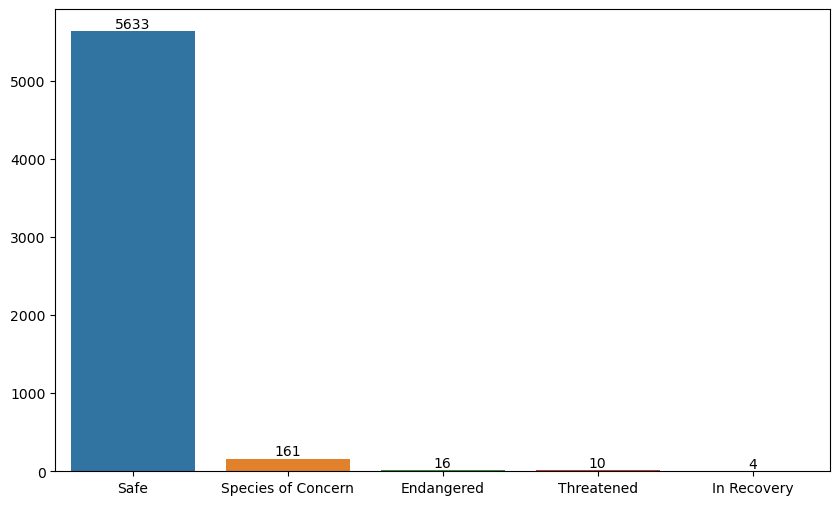

<Figure size 640x480 with 0 Axes>

In [117]:
# Plotting the bar plot
cons = list(Species.conservation_status.value_counts().index) 
counts_c = list(Species.conservation_status.value_counts())
plt.figure(figsize=(10,6)) # Adjusting the figure for more readability 
ax = sns.barplot(x = cons, y= counts_c) # Seaborn used to ease up the process of setting x_ticks
ax.bar_label(ax.containers[0]) # To show values on each bar
plt.show()
plt.clf()

In [118]:
# Showcasing proportions

(Species.conservation_status.value_counts()/len(Species.conservation_status))*100

conservation_status
Safe                  96.720467
Species of Concern     2.764423
Endangered             0.274725
Threatened             0.171703
In Recovery            0.068681
Name: count, dtype: float64